# Prepping the Data

In [70]:
import pysr
from pysr import PySRRegressor

import xarray as xr
import netCDF4 as nc
#import h5netcdf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from glob import glob
import seaborn as sns

import os

In [71]:
folder_path = '/home/laurapong321/leap_24/les_sim_2'

#getting the correct dimension values
nc_test1 = nc.Dataset(os.path.join(folder_path, 'Ug2Q010_I.nc'), mode='r')
z_256 = nc_test1.variables['z'][:]
zh_257 = nc_test1.variables['zh'][:]
t_120 = nc_test1.variables['time'][:]
#rewrite this code but using 'Ug2Q010_IV.nc' instead
nc_test2 = nc.Dataset(os.path.join(folder_path, 'Ug2Q010_IV.nc'), mode='r')
z_384 = nc_test2.variables['z'][:]
zh_385 = nc_test2.variables['zh'][:]
t_90 = nc_test2.variables['time'][:]
print(len(z_256), len(zh_257), len(t_120), len(z_384), len(zh_385), len(t_90))

256 257 120 384 385 90


In [72]:
def read_data(filepath):
    """
    Reads in each dataset and returns an xarray dataset
    """

    ds_thm = xr.open_dataset(f"{filepath}",
                             decode_times=False, group="thermo")
    ds_bud = xr.open_dataset(f"{filepath}",
                            decode_times=False, group="budget")
    ds_def = xr.open_dataset(f"{filepath}", 
                             decode_times=False, group="default")
    ds = xr.merge([ds_thm, ds_bud, ds_def], join="inner")

    if len(ds.time) == 90:
        ds = ds.assign_coords({"time": t_90}).swap_dims({"time":"time"})
    elif len(ds.time) == 120:
        ds = ds.assign_coords({"time": t_120}).swap_dims({"time":"time"})

    if len(ds.z) == 256:
        ds = ds.assign_coords({"z": z_256}).swap_dims({"z":"z"})
    elif len(ds.z) == 384:
        ds = ds.assign_coords({"z": z_384}).swap_dims({"z":"z"})

    if len(ds.zh) == 257:
        ds = ds.assign_coords({"zh": zh_257}).swap_dims({"zh":"zh"})
    elif len(ds.zh) == 385:
        ds = ds.assign_coords({"zh": zh_385}).swap_dims({"zh":"zh"})

 
    return ds

In [73]:
#opening data
folder_path = '/home/laurapong321/leap_24/les_sim_2'

files = glob(f"{folder_path}/*")

iv16_1 = read_data(files[1])
iv16_3 = read_data(files[2])
i16_6 = read_data(files[3])
iv16_6 = read_data(files[4])
iv16_10 = read_data(files[5])
ii10_1 = read_data(files[6])
i2_20 = read_data(files[7])
iv2_10 = read_data(files[8])
iii2_1 = read_data(files[9])
i2_24 = read_data(files[10])
iii8_3 = read_data(files[11])
ii8_3 = read_data(files[12])
iv8_3 = read_data(files[13])
iv8_6 = read_data(files[14])

# Plots Instructions

### Generate the following plots for data analysis:
 1. Time vs. PBL (Planetary Boundary Layer) height: This plot helps visualize how the boundary layer height varies over time.
 2. Theta vs. Height: Plot Theta (potential temperature) against height to analyze temperature profiles in the atmosphere.
 3. Theta Flux vs. Height: Show how Theta flux (turbulent heat flux) varies with height.

For the plots involving height (Theta vs. Height, Theta Flux vs. Height), consider plotting several time steps.
This approach will illustrate how the profiles evolve with time, providing insights into dynamic changes in the atmosphere.

In [5]:
# weak inversion, ug=8, q=006
iv8_6_plot_var = iv8_6[["zi", "th", "th_flux"]]

Text(0.5, 1.0, 'Plot 1: Time vs PBL')

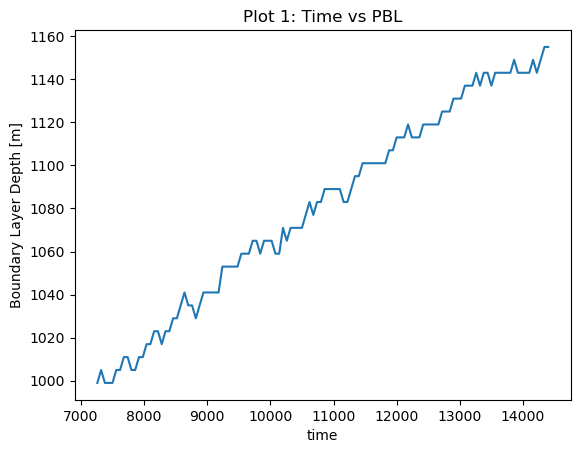

In [6]:
iv8_6_plot_var.zi.plot()
plt.title("Plot 1: Time vs PBL")

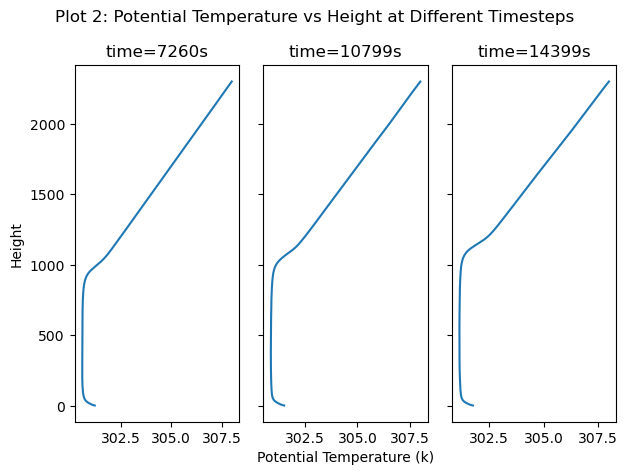

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Plot 2: Potential Temperature vs Height at Different Timesteps')

ax1.plot(iv8_6_plot_var.th.isel(time=0), iv8_6_plot_var.z)
ax1.set_title(f"time={int(iv8_6_plot_var.isel(time=0).time.values)}s")
ax1.set_ylabel("Height")

ax2.plot(iv8_6_plot_var.th.isel(time=59), iv8_6_plot_var.z)
ax2.set_title(f"time={int(iv8_6_plot_var.isel(time=59).time.values)}s")
ax2.set_xlabel("Potential Temperature (k)")

ax3.plot(iv8_6_plot_var.th.isel(time=119), iv8_6_plot_var.z)
ax3.set_title(f"time={int(iv8_6_plot_var.isel(time=119).time.values)}s")

plt.tight_layout()


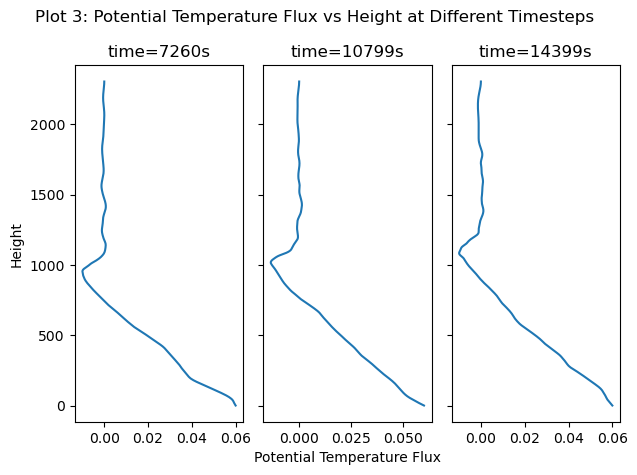

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

fig.suptitle('Plot 3: Potential Temperature Flux vs Height at Different Timesteps')

ax1.plot(iv8_6_plot_var.th_flux.isel(time=0), iv8_6_plot_var.zh)
ax1.set_title(f"time={int(iv8_6_plot_var.isel(time=0).time.values)}s")
ax1.set_ylabel("Height")

ax2.plot(iv8_6_plot_var.th_flux.isel(time=59), iv8_6_plot_var.zh)
ax2.set_title(f"time={int(iv8_6_plot_var.isel(time=59).time.values)}s")
ax2.set_xlabel("Potential Temperature Flux")

ax3.plot(iv8_6_plot_var.th_flux.isel(time=119), iv8_6_plot_var.zh)
ax3.set_title(f"time={int(iv8_6_plot_var.isel(time=119).time.values)}s")

plt.tight_layout()


# Impact of Large-Scale Conditions on Variables

### Overview:
#### Our simulations incorporate three main large-scale variables:
 1. Surface Heating (Q): Influences the heat profile.
 2. Wind (ug): Affects the movement and distribution of air properties.
 3. Inversion (dtheta/dz): Impacts the stratification and stability, influencing PBL growth.

### Objective:
 Analyze how different combinations of these large-scale variables affect the profiles of heat, heat flux, and the growth of the PBL.

### Instructions for Plotting:
 Repeat the plotting process for multiple simulations to compare results. For each variable (heat, heat flux, PBL growth), plot the profiles from several simulations in the same figure. This visualization will help in understanding the differential impacts of Q, ug, and dtheta/dz on the simulated conditions.

 This comparative approach will provide deeper insights into the effects of large-scale atmospheric conditions on local environmental dynamics.


In [9]:
### subsetting data ###



## to compare the effects of inversion

# weak inversion, ug=8, q=003
iv8_3_plot_var = iv8_3[["zi", "th", "th_flux"]]

# strong-medium inversion, ug=8, q=003
ii8_3_plot_var = ii8_3[["zi", "th", "th_flux"]]

# weak-medium inversion, ug=8, q=003
iii8_3_plot_var = iii8_3[["zi", "th", "th_flux"]]


## to compare the effects of q

# weak inversion, ug=16, q=001
iv16_1_plot_var = iv16_1[["zi", "th", "th_flux"]]

# weak inversion, ug=16, q=003
iv16_3_plot_var = iv16_3[["zi", "th", "th_flux"]]


## to compare the effects of ug, compare 
# iv16_3_plot_var and iv8_3_plot_var

## Comparing simulations: Time vs PBL

/tmp/ipykernel_7909/2965282163.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticks(), rotation=70)
/tmp/ipykernel_7909/2965282163.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticks(), rotation=70)
/tmp/ipykernel_7909/2965282163.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticks(), rotation=70)


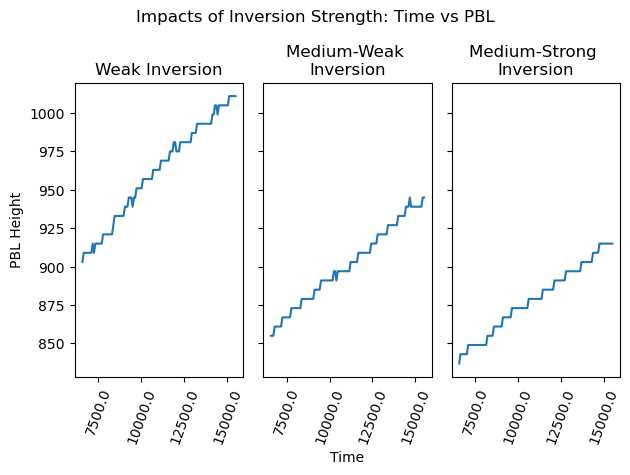

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)

fig.suptitle('Impacts of Inversion Strength: Time vs PBL')

ax1.plot(iv8_3_plot_var.time, iv8_3_plot_var.zi)
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("PBL Height")
ax1.set_xticklabels(ax1.get_xticks(), rotation=70)

ax2.plot(iii8_3_plot_var.time, iii8_3_plot_var.zi)
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Time")
ax2.set_xticklabels(ax2.get_xticks(), rotation=70)


ax3.plot(ii8_3_plot_var.time, ii8_3_plot_var.zi)
ax3.set_title(f"Medium-Strong \nInversion")
ax3.set_xticklabels(ax3.get_xticks(), rotation=70)


plt.tight_layout()

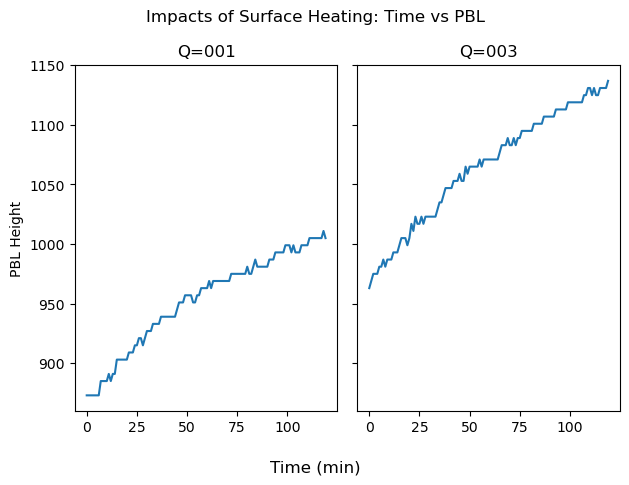

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)

fig.suptitle('Impacts of Surface Heating: Time vs PBL')

ax1.plot(iv16_1_plot_var.zi)
ax1.set_title(f"Q=001")
ax1.set_ylabel("PBL Height")

ax2.plot(iv16_3_plot_var.zi)
ax2.set_title(f"Q=003")

fig.supxlabel("Time (min)")
plt.tight_layout()


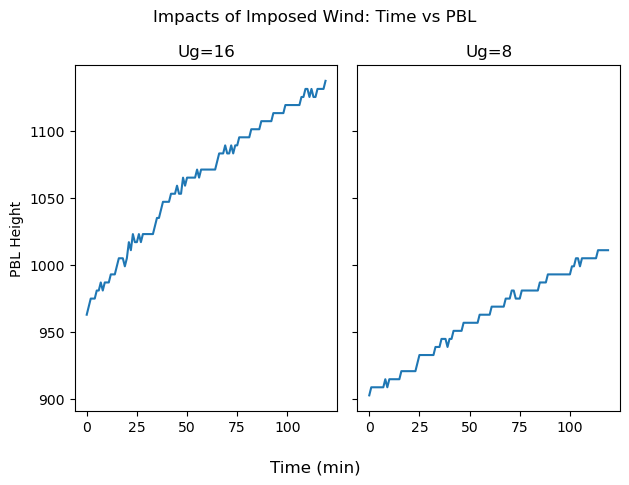

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Imposed Wind: Time vs PBL')

ax1.plot(iv16_3_plot_var.zi)
ax1.set_title(f"Ug=16")
ax1.set_ylabel("PBL Height")

ax2.plot(iv8_3_plot_var.zi)
ax2.set_title(f"Ug=8")

fig.supxlabel("Time (min)")
plt.tight_layout()


## Comparing Simulations: Potential Temperature vs Height (at time=100)

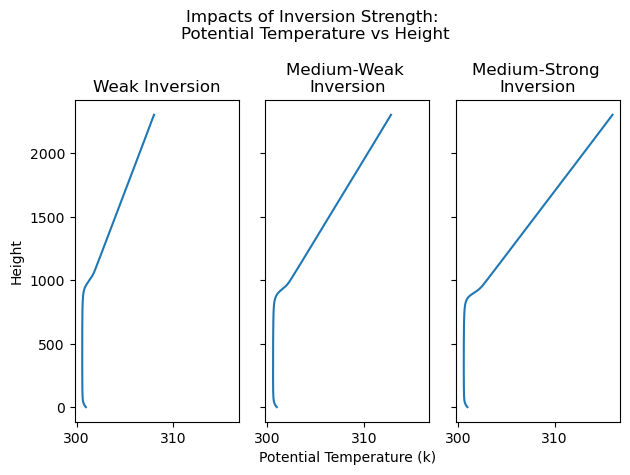

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)

fig.suptitle('Impacts of Inversion Strength: \nPotential Temperature vs Height')

ax1.plot(iv8_3_plot_var.th.isel(time=100), iv8_3_plot_var.z)
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("Height")

ax2.plot(iii8_3_plot_var.th.isel(time=100), iii8_3_plot_var.z)
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Potential Temperature (k)")

ax3.plot(ii8_3_plot_var.th.isel(time=100), ii8_3_plot_var.z)
ax3.set_title(f"Medium-Strong \nInversion")

plt.tight_layout()

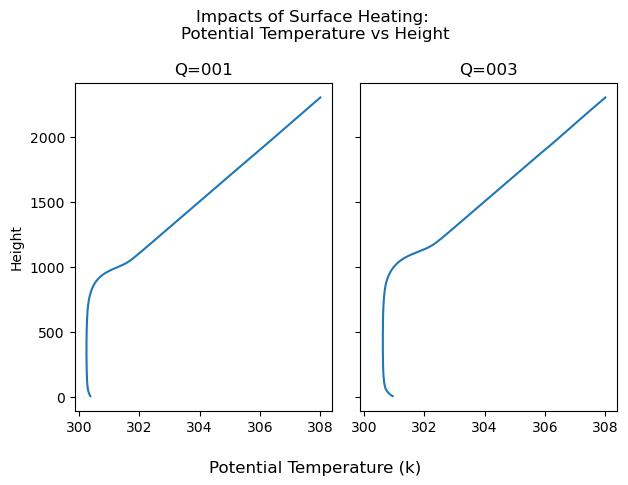

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Surface Heating: \nPotential Temperature vs Height')

ax1.plot(iv16_1_plot_var.th.isel(time=100), iv16_1_plot_var.z)
ax1.set_title(f"Q=001")
ax1.set_ylabel("Height")

ax2.plot(iv16_3_plot_var.th.isel(time=100), iv16_3_plot_var.z)
ax2.set_title(f"Q=003")

fig.supxlabel("Potential Temperature (k)")
plt.tight_layout()

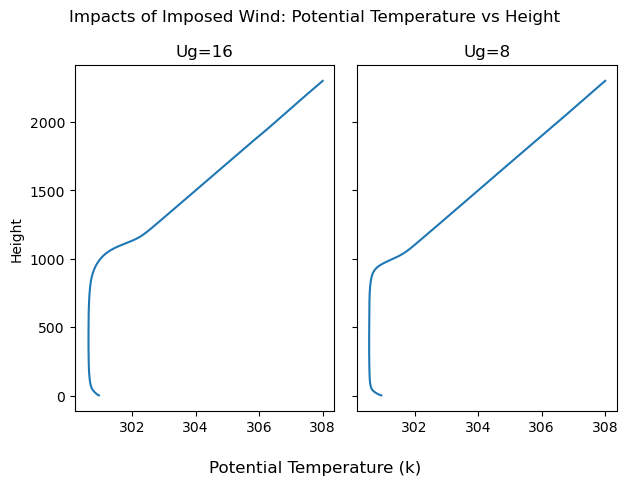

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Imposed Wind: Potential Temperature vs Height')

ax1.plot(iv16_3_plot_var.th.isel(time=100), iv16_3_plot_var.z)
ax1.set_title(f"Ug=16")
ax1.set_ylabel("Height")

ax2.plot(iv8_3_plot_var.th.isel(time=100), iv8_3_plot_var.z)
ax2.set_title(f"Ug=8")

fig.supxlabel("Potential Temperature (k)")
plt.tight_layout()


## Comparing Simulations: Potential Temperature Flux vs Height (at time=100)

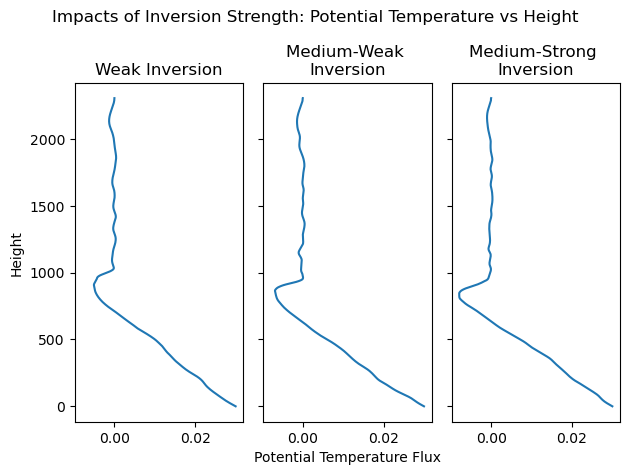

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)

fig.suptitle('Impacts of Inversion Strength: Potential Temperature vs Height')

ax1.plot(iv8_3_plot_var.th_flux.isel(time=100), iv8_3_plot_var.zh)
ax1.set_title(f"Weak Inversion")
ax1.set_ylabel("Height")

ax2.plot(iii8_3_plot_var.th_flux.isel(time=100), iii8_3_plot_var.zh)
ax2.set_title(f"Medium-Weak \nInversion")
ax2.set_xlabel("Potential Temperature Flux")

ax3.plot(ii8_3_plot_var.th_flux.isel(time=100), ii8_3_plot_var.zh)
ax3.set_title(f"Medium-Strong \nInversion")

plt.tight_layout()

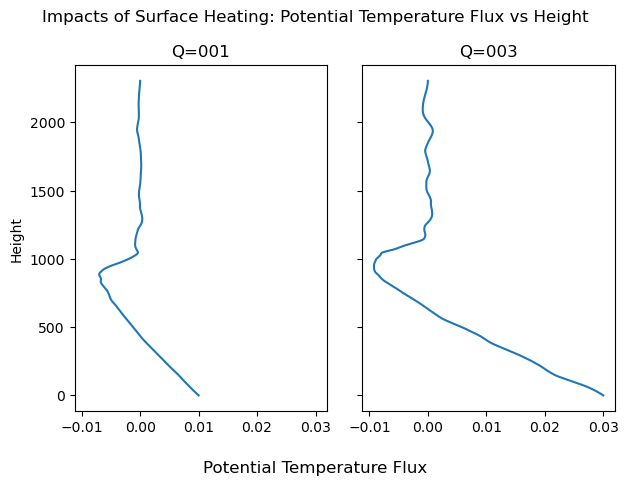

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Surface Heating: Potential Temperature Flux vs Height')

ax1.plot(iv16_1_plot_var.th_flux.isel(time=100), iv16_1_plot_var.zh)
ax1.set_title(f"Q=001")
ax1.set_ylabel("Height")

ax2.plot(iv16_3_plot_var.th_flux.isel(time=100), iv16_3_plot_var.zh)
ax2.set_title(f"Q=003")

fig.supxlabel("Potential Temperature Flux")
plt.tight_layout()

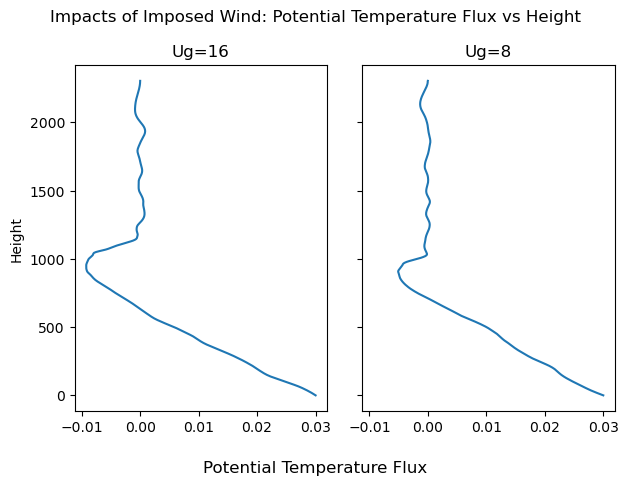

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, sharex=True)

fig.suptitle('Impacts of Imposed Wind: Potential Temperature Flux vs Height')

ax1.plot(iv16_3_plot_var.th_flux.isel(time=100), iv16_3_plot_var.zh)
ax1.set_title(f"Ug=16")
ax1.set_ylabel("Height")

ax2.plot(iv8_3_plot_var.th_flux.isel(time=100), iv8_3_plot_var.zh)
ax2.set_title(f"Ug=8")

fig.supxlabel("Potential Temperature Flux")
plt.tight_layout()


# Equation Discovery for PBL Growth
Identify a list of variables that might influence the growth of the Planetary Boundary Layer (PBL) (represented as dh/dz).
The book chapter has a nice discussion on the relevant variables on the PBL growth. 


Assess whether the Equation Discovery (EQ) method can be used to derive a functional equation that explains PBL growth based on the identified variables.

This task involves both theoretical formulation and empirical verification, aiming to develop a predictive understanding of PBL dynamics.

## Finding and making variables for EQ

In [19]:
#printing out all the variables and long names
df = nc.Dataset(files[10], mode='r')
for group_name, group in df.groups.items():
    print(f"Group: {group_name}")
    for var_name, var in group.variables.items():
        long_name = var.getncattr('long_name') if 'long_name' in var.ncattrs() else 'No long_name attribute'
        dimensions = var.dimensions if hasattr(var, 'dimensions') else 'No dimensions attribute'
        print(f"  Variable: {var_name},  Long Name: {long_name},  Dimensions: {dimensions}")
df.close()

Group: default
  Variable: iter,  Long Name: Iteration number,  Dimensions: ('time',)
  Variable: area,  Long Name: Fractional area contained in mask,  Dimensions: ('time', 'z')
  Variable: areah,  Long Name: Fractional area contained in mask,  Dimensions: ('time', 'zh')
  Variable: eft,  Long Name: eft,  Dimensions: ('time', 'z')
  Variable: eft_3,  Long Name: Moment 3 of the eft,  Dimensions: ('time', 'z')
  Variable: eft_4,  Long Name: Moment 4 of the eft,  Dimensions: ('time', 'z')
  Variable: eft_diff,  Long Name: Diffusive flux of the eft,  Dimensions: ('time', 'zh')
  Variable: eft_w,  Long Name: Turbulent flux of the eft,  Dimensions: ('time', 'zh')
  Variable: eft_grad,  Long Name: Gradient of the eft,  Dimensions: ('time', 'zh')
  Variable: eft_2,  Long Name: Moment 2 of the eft,  Dimensions: ('time', 'z')
  Variable: eft_path,  Long Name: eft path,  Dimensions: ('time',)
  Variable: eft_flux,  Long Name: Total flux of the eft,  Dimensions: ('time', 'zh')
  Variable: sft,  Lo

In [74]:
def find_jump(ds, filter_num=.001):
    """
    Returns a dataset with the new variable
     th_jump with only the time coordinate
    """
    #making an array to store all the values of th_jump
    th_jump = np.array([])

    #prepping ds
    ds_jump = ds.copy()
    ds_jump = ds_jump[["th"]]

    #looping through every time and calculating th_jump
    for i in range(len(ds_jump.time)):

        #calculating the second derivate using np.diff
        #(central diff)
        diff_df = np.diff(ds_jump.isel(time=i).th, n=2)

        #putting the array into a dataframe to preserve the index
        #(height var)
        diff_df = pd.DataFrame(diff_df)
        diff_df = diff_df.reset_index()
        diff_df = diff_df.rename(columns={"index": "z", 0:"sec_der"})

        #chopping off the beginning and end of the df
        diff_df = diff_df.iloc[50:350]

        #filtering the df to only select for heights
        #with big enough second derivatives
        diff_df = diff_df[np.abs(diff_df["sec_der"]) >= filter_num]

        if len(diff_df) == 0:
            return "Try different filter num, everything filtered out"
        

        #getting the heights
        if (diff_df.z.iloc[1] - diff_df.z.iloc[0]) <= 1:
            min_z = diff_df.z.iloc[0]
        #making sure to cut off tails of sparse values
        else:
            j = 1
            while (diff_df.z.iloc[j+1] - diff_df.z.iloc[j]) >= 2:
                min_z = diff_df.z.iloc[j]
                j+=1

        
        if (diff_df.z.iloc[-1] - diff_df.z.iloc[-2]) <= 1:
            max_z = diff_df.z.iloc[-1]
        #making sure to cut off tails of sparse values
        else:
            j=-2
            while (diff_df.z.iloc[j] - diff_df.z.iloc[j-1]) >=2:
                max_z = diff_df.z.iloc[j]
                j-=1
        
        #calc th_jump
        jump = (ds_jump.isel(time=i, z=max_z).th.values - ds_jump.isel(time=i, z=min_z).th.values)
        if jump < 0:
            return f"Error in calculation: th_jump at time={i} is negative"

        #adding values to array
        if len(th_jump) == 0:
            th_jump = np.array([jump])
        else:
            th_jump = np.concatenate((th_jump, np.array([jump])))

    if len(th_jump) != len(ds_jump.time):
        return "Error in code"
    
    #adding array of th_jumps to the original ds, index is time
    ds = ds.assign(del_th_sd=(['time'],th_jump))


    return ds
    

In [75]:
def flux_jump(ds, filter_num=.00005):
    """
    Returns the ds with new variable delta theta rho 
    calculated using th_flux"""

    #making an array to store all the values of th_jump
    th_jump = np.array([])

    #prepping ds
    ds_jump = ds.copy()
    ds_jump = ds_jump[["th_flux"]]

    #looping through every time and calculating th_jump
    for i in range(len(ds_jump.time)):
        jump = ds_jump.isel(time=i)
        jump = jump.where(np.abs(jump.th_flux) <= filter_num)
        jump = jump.to_dataframe().reset_index()
        jump = jump.dropna()

        #finding min and max heights

        if (jump.zh.iloc[1] - jump.zh.iloc[0]) > 100:
            min_z = int(jump.zh.iloc[0])
            max_z = int(jump.zh.iloc[1])
        else:
            min_num = 1
            while (jump.zh.iloc[min_num+1] - jump.zh.iloc[min_num]) <= 100:
                min_z = int(jump.zh.iloc[min_num+1])
                max_z = int(jump.zh.iloc[min_num+2])
                min_num += 1

        #calculating jump
        th_inver = ds.isel(time=i).sel(z=max_z+3).th.values - ds.isel(time=i).sel(z=min_z+3).th.values

               #adding values to array
        if len(th_jump) == 0:
            th_jump = np.array([th_inver])
        else:
            th_jump = np.concatenate((th_jump, np.array([th_inver])))

    
    #adding array of th_jumps to the original ds, index is time
    ds = ds.assign(del_th_f=(['time'],th_jump)) 

    return ds

In [76]:
def prep_ds_ed(ds, ug, Q, filter_num_sd=.001, filter_num_f=.0001):
    """
    Makes an xarray dataset with all the necesscary variables for
    equation discovery"""

    ds_return = ds.copy()
    #selecting necessary vars
    ds_return = ds_return[["zi", "th", "th_flux", "b_flux"]]

    #calc dh/dt
    dt = ds_return.time.isel(time=1).values - ds_return.time.isel(time=0).values
    bl_evo = np.gradient(ds_return.zi, int(dt))
    #adding dh/dt to ds
    ds_return = ds_return.assign(dh_dt=(['time'],bl_evo))

    #finding del_th
    ds_return = find_jump(ds_return, filter_num_sd)
    ds_return = flux_jump(ds_return, filter_num_f)

    #calc dth_dz
    dz = ds_return.z.isel(z=1).values - ds_return.z.isel(z=0).values
    grad = np.gradient(ds_return.isel(time=10).th, dz)
    grad = np.round(grad[225], 3)
    dth_dz = grad*np.ones((ds_return.time.shape))
    ds_return = ds_return.assign(dth_dz=(["time"], dth_dz))
    
    #making th_0 var
    th_0 = 300 * np.ones((ds_return.time.shape))
    ds_return = ds_return.assign(th_0=(['time'],th_0)) 

    #making q var
    q = Q*np.ones((ds_return.time.shape))
    ds_return = ds_return.assign(q=(["time"], q))

    #making surface b_flux
    ds_return["b_flux_sfc"] = ds_return.b_flux.sel(zh=0)

    #making u_g var
    u_g = ug*np.ones((ds_return.time.shape))
    ds_return = ds_return.assign(u_g=(["time"], u_g))

    #resampling using coarsen across all variables
    ds_return = ds_return.coarsen(time=15).mean()
    
    return ds_return
    

In [77]:
def extract_var(var):
    """
    Returns a 1d array of the desired variable across all simulations
    """

    #making a list of all the simulations to loop through
    sim_list = [iv16_1_ed, iv16_3_ed, i16_6_ed,
            iv16_6_ed, iv16_10_ed, ii10_1_ed,
            i2_20_ed, iv2_10_ed, iii2_1_ed,
             i2_24_ed, iii8_3_ed, ii8_3_ed, 
            iv8_3_ed, iv8_6_ed]
    
    #making empty array to putt all the data in
    var_arr = np.array([])

    #making a 1d array of the var from the simulation
    for sim in sim_list:
        sim_var = sim[var].to_numpy()
        
        #adding to the var_arr
        if len(var_arr) == 0:
            var_arr = sim_var
        else:
            var_arr = np.concatenate((var_arr, sim_var))
    
    return var_arr


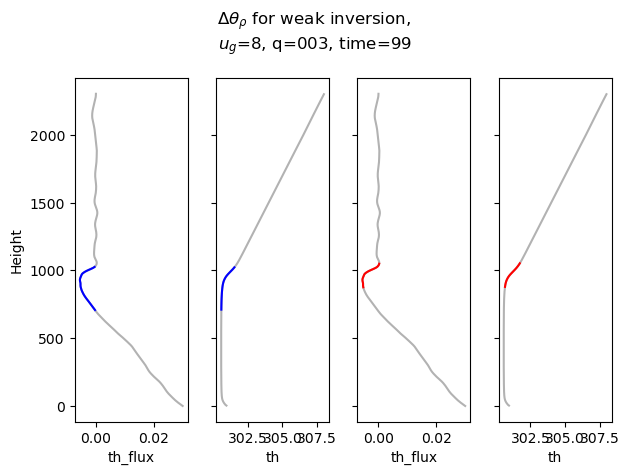

In [16]:
### comparing methods ####


## second derivative method ##


#making an array to store all the values of th_jump
th_jump = np.array([])

#prepping ds
ds_sec_der_f = iv8_3.copy()
ds_sec_der = ds_sec_der_f[["th"]]

#looping through every time and calculating th_jump
for i in range(99,100):#range(len(ds_sec_der.time)):

    #calculating the second derivate using np.diff
    #(central diff)
    diff_df = np.diff(ds_sec_der.isel(time=i).th, n=2)

    #putting the array into a dataframe to preserve the index
    #(height var)
    diff_df = pd.DataFrame(diff_df)
    diff_df = diff_df.reset_index()
    diff_df = diff_df.rename(columns={"index": "z", 0:"sec_der"})

    #chopping off the beginning and end of the df
    diff_df = diff_df.iloc[50:350]

    #filtering the df to only select for heights
    #with big enough second derivatives
    diff_df = diff_df[np.abs(diff_df["sec_der"]) >= .001]

    

    #getting the heights
    if (diff_df.z.iloc[1] - diff_df.z.iloc[0]) <= 1:
        min_z_sd = int(diff_df.z.iloc[0])
    #making sure to cut off tails of sparse values
    else:
        j = 1
        while (diff_df.z.iloc[j+1] - diff_df.z.iloc[j]) >= 2:
            min_z_sd = int(diff_df.z.iloc[j+1])
            j+=1

    
    if (diff_df.z.iloc[-1] - diff_df.z.iloc[-2]) <= 1:
        max_z_sd = int(diff_df.z.iloc[-1])
    #making sure to cut off tails of sparse values
    else:
        j=-2
        while (diff_df.z.iloc[j] - diff_df.z.iloc[j-1]) >=2:
            max_z_sd = int(diff_df.z.iloc[j-1])
            j-=1



## th_flux method ##

#making an array to store all the values of th_jump
th_jump = np.array([])

#prepping ds
ds_jump_f = iv8_3.copy()
ds_jump = ds_jump_f[["th_flux"]]

#looping through every time and calculating th_jump
for i in range(99,100):
    jump = ds_jump.isel(time=i)
    jump = jump.where(np.abs(jump.th_flux) <= .0005)
    jump = jump.to_dataframe().reset_index()
    jump = jump.dropna()

    #finding min and max heights

    if (jump.zh.iloc[1] - jump.zh.iloc[0]) > 100:
        min_z = int(jump.zh.iloc[0])
        max_z = int(jump.zh.iloc[1])
    else:
        min_num = 1
        while (jump.zh.iloc[min_num+1] - jump.zh.iloc[min_num]) <= 100:
            min_z = int(jump.zh.iloc[min_num+1])
            max_z = int(jump.zh.iloc[min_num+2])
            min_num += 1




### plotting ###


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)

fig.suptitle("$\\Delta\\theta_\\rho$ for weak inversion, \n$u_g$=8, q=003, time=99")

ax1.plot(ds_jump_f.th_flux.isel(time=99), ds_jump_f.zh, c="k", alpha=.3)
ax1.plot(ds_jump_f.th_flux.isel(time=99).sel(zh=slice(int(min_z), int(max_z))),
          ds_jump_f.zh.sel(zh=slice(int(min_z), int(max_z))), c="b")
ax1.set_ylabel("Height")
ax1.set_xlabel("th_flux")

ax2.plot(ds_jump_f.th.isel(time=99), ds_jump_f.z, c="k", alpha=.3)
ax2.plot(ds_jump_f.th.isel(time=99).sel(z=slice(int(min_z), max_z)),
          ds_jump_f.z.sel(z=slice(min_z, max_z)), c="b")
ax2.set_xlabel("th")

ax3.plot(ds_sec_der_f.th_flux.isel(time=99), ds_jump_f.zh, c="k", alpha=.3)
ax3.plot(ds_sec_der_f.th_flux.isel(time=99, zh=slice(min_z_sd, max_z_sd)),
          ds_jump_f.zh.isel(zh=slice(min_z_sd, max_z_sd)), c="r")
ax3.set_xlabel("th_flux")

ax4.plot(ds_sec_der_f.th.isel(time=99), ds_sec_der_f.z, c="k", alpha=.3)
ax4.plot(ds_sec_der_f.th.isel(time=99, z=slice(min_z_sd, max_z_sd)),
          ds_sec_der_f.z.isel(z=slice(min_z_sd, max_z_sd)), c="r")
ax4.set_xlabel("th")

plt.tight_layout()

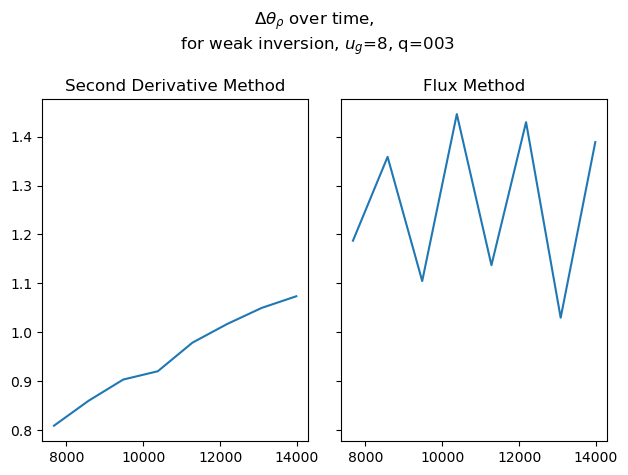

In [18]:
#trying functions, making sure that it works, but coarsened

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True)

fig.suptitle(f"$\\Delta \\theta_\\rho$ over time, \n for weak inversion, $u_g$=8, q=003")

iv8_6_th_jump_sd = find_jump(iv8_3, .00125)
ax1.plot(iv8_6_th_jump_sd.coarsen(time=15).mean().time, iv8_6_th_jump_sd.coarsen(time=15).mean().del_th_sd)
ax1.set_title("Second Derivative Method")

iv8_6_th_jump_flux = flux_jump(iv8_3, .00005)
ax2.plot(iv8_6_th_jump_flux.coarsen(time=15).mean().time, iv8_6_th_jump_flux.coarsen(time=15).mean().del_th_f)
ax2.set_title("Flux Method")

plt.tight_layout()


In [78]:
#prepping all the simulations for sr
iv16_1_ed = prep_ds_ed(iv16_1, 16, 1, filter_num_sd=.001, filter_num_f=.0002)
iv16_3_ed = prep_ds_ed(iv16_3, 16, 3, filter_num_sd=.00075)
i16_6_ed = prep_ds_ed(i16_6, 16, 6, filter_num_sd=.0002, filter_num_f=.0006)
iv16_6_ed = prep_ds_ed(iv16_6, 16, 6)
iv16_10_ed = prep_ds_ed(iv16_10, 16, 10, filter_num_f=.0002)
ii10_1_ed = prep_ds_ed(ii10_1, 10, 1, filter_num_f=.0005)
i2_20_ed = prep_ds_ed(i2_20,2, 20, filter_num_sd=.00025, filter_num_f=.0007)
iv2_10_ed = prep_ds_ed(iv2_10, 2, 10)
iii2_1_ed = prep_ds_ed(iii2_1, 2, 1)
i2_24_ed = prep_ds_ed(i2_24, 2, 24, filter_num_sd=.002, filter_num_f=.01)
iii8_3_ed = prep_ds_ed(iii8_3, 8, 3)
ii8_3_ed = prep_ds_ed(ii8_3, 8, 3)
iv8_3_ed = prep_ds_ed(iv8_3, 8, 3)
iv8_6_ed = prep_ds_ed(iv8_6, 8, 6)

## Equation discovery for BL growth over time

#### We'll try to discover equation 5.76 in Clouds and Climate:

$$\frac{dh}{dt} = A\frac{\overline{w'b'_{sfc}}}{\frac{g}{\theta_0}\Delta\theta_\rho} + \overline{w_h}$$

where
- A is a constant (typically .2 or .4)
- $\overline{w'b'_{sfc}}$ is buoyancy flux and is ```b_flux``` at zh=0 in the simulations
- g is a constant (gravity)
- $\theta_0$ is a constant (300k)
- $\Delta\theta_\rho$ is the change in $\theta$ at the inversion layer
- $\overline{w_h}$ is assumed to be 0


In [79]:
#extracting all the variables
dh_dt = extract_var("dh_dt")
b_flux = extract_var("b_flux_sfc")
th_0 = extract_var("th_0")
del_th_sd = extract_var("del_th_sd")
del_th_f = extract_var("del_th_f")
dth_dz = extract_var("dth_dz")
q = extract_var("q")
u_g = extract_var("u_g")



#stacking all the inputs
X_small_sd = pd.DataFrame(np.column_stack([b_flux, del_th_sd]),
                          columns=["b_flux", "del_th_sd"])
X_small_f = pd.DataFrame(np.column_stack([b_flux, del_th_f]),
                         columns=["b_flux", "del_th_f"])

X_full_sd = pd.DataFrame(np.column_stack([b_flux, del_th_sd, dth_dz, q, u_g]),
                         columns=["b_flux", "del_th_sd", "dth_dz", "q", "u_g"])
X_full_f = pd.DataFrame(np.column_stack([b_flux, del_th_f, dth_dz, q, u_g]),
                        columns=["b_flux", "del_th_f", "dth_dz", "q", "u_g"])


In [24]:
#making the model

pbl_h_model = PySRRegressor(
    niterations=500,  # < Increase for better results
    batching=True, #same as minibatching for NN
    batch_size=50,

    binary_operators=["+", "-", "*", "/"],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [332]:
#fit the model
pbl_h_model.fit(X_full_f, dh_dt)

/home/laurapong321/anaconda3/envs/pnw_env/lib/python3.12/site-packages/pysr/sr.py:1843: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/laurapong321/anaconda3/envs/pnw_env/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 5.780e+04
Head worker occupation: 5.7%
Progress: 130 / 7500 total iterations (1.733%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           1.141e-04  5.314e+00  y = 0.49728 * 0.037415
5           9.006e-05  1.185e-01  y = 0.031238 - (x₂ * x₁)
7           6.423e-05  1.690e-01  y = ((x₄ * x₀) / x₁) + 0.013559
9           4.851e-05  1.404e-01  y = ((x₀ * x₄) + (0.36647 - 0.34424)) / x₁
17          4.628e-05  5.879e-03  y = (((x₀ * (((-0.24059 + x₀) - -1.6704) + x₄)) - x₂) + (0.202...
                                  56 - 0.17461)) / x₁
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 7.590e+04
Head worker occupation: 6.9%
Progress: 365 / 7500 total iterations (4.867%)
Hall of Fame:
-----------------------

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                        0.018838419   
	1        0.110508                                   0.036263485 / x1   
	2        0.069651                            (0.032551307 / x1) + x0   
	3  >>>>  0.245521                     ((x0 * x4) + 0.022655858) / x1   
	4        0.066893         ((x0 * (2.5721276 + x4)) + 0.0162224) / x1   
	5        0.003973  ((x0 * (x4 + (1.5560527 - -1.484246))) + 0.016...   
	6        0.010378  ((x0 * (x4 + ((2.55026 / x4) - -1.484246))) + ...   
	7        0.015948  ((x0 * (x4 + (((2.55026 + 1.5560527) / x4) - -...   
	8        0.005138  ((x0 * (x4 + (((2.55026 + 2.55026) / (x4 - 0.4...   
	
	       loss  complexity  
	0  0.000114           1  
	1  0.000091           3  
	2  0.000080           5  
	3  0.000049           7  
	4  0.000043           9  
	5  0.000042          11  
	6  0.000041          13  
	7  0.000040          15  
	8  0.000040          17  
]

**for reference:**
- $x_0$ is `b_flux`
- $x_1$ is `del_th`
- $x_2$ is `dth_dz`
- $x_3$ is `q`
- $x_4$ is `u_g`

In [25]:
#saving all the discovered equations
small_sd_pred = (b_flux + b_flux/(b_flux + 0.13372053) + 0.016728774)/(del_th_sd + 0.13372053/del_th_sd**3)
full_sd_pred = b_flux + (0.660742449861211*b_flux*(0.951442648702161*u_g + 3.9925944) + 0.0121143933759893)/del_th_sd

small_f_pred = b_flux*(-3.66893910203278*b_flux - 1.5784361*del_th_f + 6.70738123 + 0.014612216/b_flux)
full_f_pred = (b_flux*(u_g + 0.79555905 + 5.10052/(u_g - 0.41880095)) + 0.0162224)/del_th_f

### Second derivative method, only using $\overline{w'b'_{sfc}}$ and $\Delta\theta_\rho$

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_7909/612643228.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using $\\Delta\\theta_\\rho$ (sd method) and $\overline{w'b'_{sfc}}$")


Text(0, 0.5, "ED $\\frac{{{dh}}}{{{dt}}}$, using $\\Delta\\theta_\\rho$ (sd method) and $\\overline{w'b'_{sfc}}$")

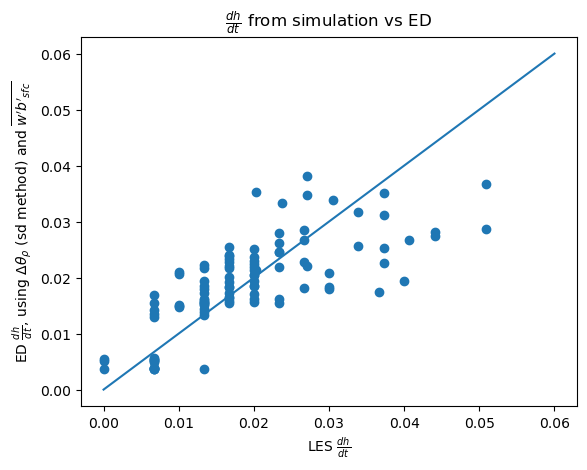

In [26]:
plt.scatter(dh_dt, small_sd_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using $\\Delta\\theta_\\rho$ (sd method) and $\overline{w'b'_{sfc}}$")

In [30]:
#isolating each term
first_term_ssd = (b_flux)/(del_th_sd + 0.13372053/del_th_sd**3)
sec_term_ssd = (b_flux/(b_flux + 0.13372053))/(del_th_sd + 0.13372053/del_th_sd**3)
third_term_ssd = (0.016728774)/(del_th_sd + 0.13372053/del_th_sd**3)
last_term_ssd = (b_flux + b_flux/(b_flux + 0.13372053) + 0.016728774)/(del_th_sd + 0.13372053/del_th_sd**3)

#making a dataframe
small_sd_meth = pd.DataFrame(np.column_stack([first_term_ssd, sec_term_ssd, third_term_ssd, last_term_ssd]),
                             columns=["first term", "second term", "third term", "predicted"])

#adding percentages of each term to see how they contribute to the prediction
small_sd_meth["first_percent"] = 100*(small_sd_meth["first term"] / small_sd_meth["predicted"])
small_sd_meth["second_percent"] = 100*(small_sd_meth["second term"] / small_sd_meth["predicted"])
small_sd_meth["third_percent"] = 100*(small_sd_meth["third term"] / small_sd_meth["predicted"])

print(f"rmse of this method is {np.sqrt(np.mean((last_term_ssd-dh_dt)**2))}")

rmse of this method is 0.0071533114525480215


In [31]:
small_sd_meth.describe()

,first term,second term,third term,predicted,first_percent,second_percent,third_percent
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.001119,0.008178,0.009465,0.018761,5.811698,42.503057,51.685246
std,0.000720,0.005217,0.004315,0.008176,2.128649,15.049429,17.176974
min,0.000213,0.001570,0.001817,0.003600,1.677335,12.512990,20.907616
25%,0.000533,0.003957,0.007146,0.015268,3.925171,29.139765,38.133442
50%,0.000878,0.006517,0.010574,0.018486,5.918374,43.619275,50.462352
75%,0.001612,0.011746,0.012900,0.023221,7.454004,54.412553,66.935064
max,0.002847,0.020785,0.015607,0.038198,9.808428,69.283956,85.809675


### Flux method, only using $\overline{w'b'_{sfc}}$ and $\Delta\theta_\rho$

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_7909/2982734378.py:5: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using $\\Delta\\theta_\\rho$ (flux method) and $\overline{w'b'_{sfc}}$")


Text(0, 0.5, "ED $\\frac{{{dh}}}{{{dt}}}$, using $\\Delta\\theta_\\rho$ (flux method) and $\\overline{w'b'_{sfc}}$")

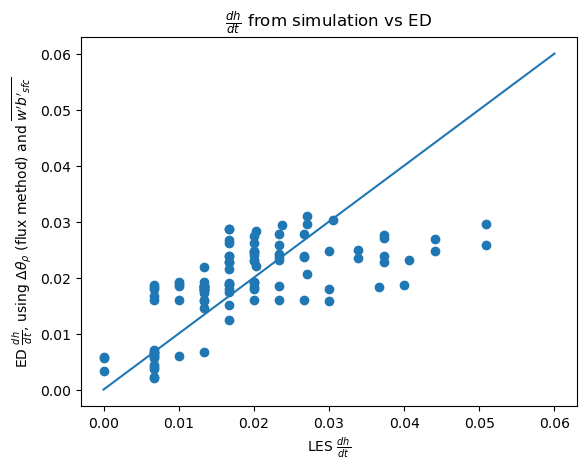

In [32]:
plt.scatter(dh_dt, small_f_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using $\\Delta\\theta_\\rho$ (flux method) and $\overline{w'b'_{sfc}}$")

In [34]:
#isolating each term
first_term_sf = b_flux*(-3.66893910203278*b_flux)
sec_term_sf = b_flux*(- 1.5784361*del_th_f)
third_term_sf = b_flux*(6.70738123)
fourth_term_sf = b_flux*(0.014612216/b_flux)
last_term_sf = b_flux*(-3.66893910203278*b_flux - 1.5784361*del_th_f + 6.70738123 + 0.014612216/b_flux)

small_f_meth = pd.DataFrame(np.column_stack([first_term_sf, sec_term_sf, third_term_sf, fourth_term_sf, last_term_sf]),
                            columns=["first_term", "second_term", "third_term", "fourth_term", "predicted"])

#adding percentages of each term to see how they contribute to the prediction
small_f_meth["first_percent"] = 100*(small_f_meth["first_term"] / small_f_meth["predicted"])
small_f_meth["second_percent"] = 100*(small_f_meth["second_term"] / small_f_meth["predicted"])
small_f_meth["third_percent"] = 100*(small_f_meth["third_term"] / small_f_meth["predicted"])
small_f_meth["fourth_percent"] = 100*(small_f_meth["fourth_term"] / small_f_meth["predicted"])

print(f"rmse of this method is {np.sqrt(np.mean((last_term_sf-dh_dt)**2))}")

rmse of this method is 0.00799489724942541


In [48]:
small_f_meth.describe()

,first_term,second_term,third_term,fourth_term,predicted,first_percent,second_percent,third_percent,fourth_percent
count,1.060000e+02,106.000000,106.000000,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000
mean,-3.440537e-05,-0.011979,0.016305,1.461222e-02,0.018904,-0.276586,-145.145887,133.662773,111.759699
std,5.717437e-05,0.013933,0.012551,1.742964e-18,0.007282,0.549318,300.239675,195.837367,113.390238
min,-2.259740e-04,-0.061067,0.002193,1.461222e-02,0.001981,-3.792528,-1742.531591,13.691590,47.074198
25%,-3.923160e-05,-0.012672,0.006580,1.461222e-02,0.016014,-0.164604,-53.168976,35.925893,61.017228
50%,-1.412338e-05,-0.005567,0.013160,1.461222e-02,0.018793,-0.066288,-23.272442,61.765389,77.757374
75%,-3.530844e-06,-0.002873,0.021933,1.461222e-02,0.023948,-0.019278,-15.462168,92.025008,91.244340
max,-3.923160e-07,-0.000786,0.052640,1.461222e-02,0.031041,-0.002449,-4.904762,1107.006058,737.505625


### Second derivative method, also using large scale dynamics

Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_sd')

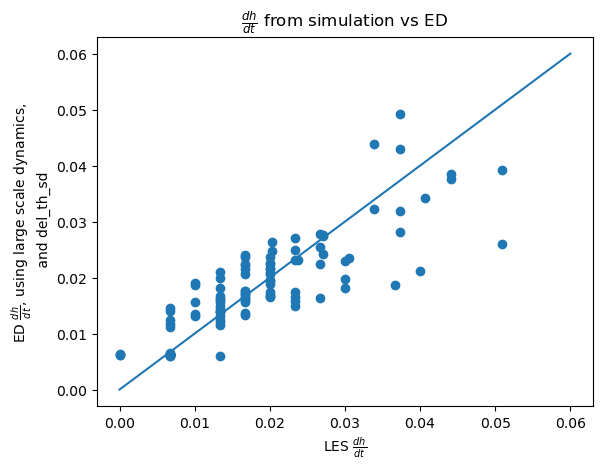

In [35]:
plt.scatter(dh_dt, full_sd_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_sd")

In [36]:
#isolating terms
first_term_fsd = b_flux
sec_term_fsd = (0.660742449861211*b_flux*(0.951442648702161*u_g + 3.9925944))/del_th_sd
third_term_fsd = (0.0121143933759893)/del_th_sd
last_term_fsd = b_flux + (0.660742449861211*b_flux*(0.951442648702161*u_g + 3.9925944) + 0.0121143933759893)/del_th_sd

full_sd_meth = pd.DataFrame(np.column_stack([first_term_fsd, sec_term_fsd, third_term_fsd, last_term_fsd]),
                            columns=["first_term", "second_term", "third_term", "predicted"])

#taking percentages
full_sd_meth["first_percent"] = 100*(full_sd_meth["first_term"] / full_sd_meth["predicted"])
full_sd_meth["second_percent"] = 100*(full_sd_meth["second_term"] / full_sd_meth["predicted"])
full_sd_meth["third_percent"] = 100*(full_sd_meth["third_term"] / full_sd_meth["predicted"])

print(f"rmse of this method is {np.sqrt(np.mean((last_term_fsd-dh_dt)**2))}")

rmse of this method is 0.005944034842233585


In [37]:
full_sd_meth.describe()

,first_term,second_term,third_term,predicted,first_percent,second_percent,third_percent
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.002431,0.008920,0.007277,0.018628,16.628129,43.457404,39.914467
std,0.001871,0.006843,0.003595,0.008748,15.632553,12.727538,17.093781
min,0.000327,0.001452,0.001316,0.005983,1.453399,23.790709,14.210060
25%,0.000981,0.004367,0.005198,0.013781,6.108277,35.600909,23.451125
50%,0.001962,0.007041,0.007837,0.017403,8.364217,41.527903,40.764342
75%,0.003270,0.011937,0.009899,0.022856,20.430147,50.659257,56.817392
max,0.007848,0.035604,0.016513,0.049262,53.583177,72.273566,73.393499


### Flux method, also using large scale dynamics

Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_f')

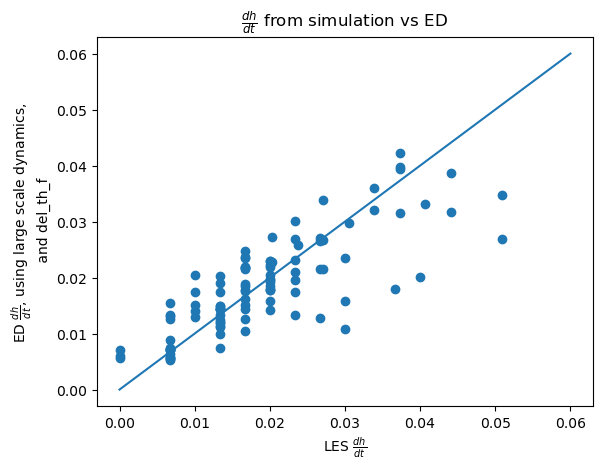

In [38]:
plt.scatter(dh_dt, full_f_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_f")

In [39]:
#isolating terms
first_term_ff = (b_flux*(u_g + 0.79555905 + 5.10052/(u_g - 0.41880095)))/del_th_f
sec_term_ff = (0.0162224)/del_th_f
full_f_pred = (b_flux*(u_g + 0.79555905 + 5.10052/(u_g - 0.41880095)) + 0.0162224)/del_th_f

#making dataframe
full_f_meth = pd.DataFrame(np.column_stack([first_term_ff, sec_term_ff, full_f_pred]),
                           columns=["first_term", "second_term", "predicted"])

#taking percentages
full_f_meth["first_percent"] = 100*(full_f_meth["first_term"] / full_f_meth["predicted"])
full_f_meth["second_percent"] = 100*(full_f_meth["second_term"] / full_f_meth["predicted"])

print(f"rmse of this method is {np.sqrt(np.mean((full_f_pred-dh_dt)**2))}")

rmse of this method is 0.006299697956718081


In [40]:
full_f_meth.describe()

,first_term,second_term,predicted,first_percent,second_percent
count,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.010331,0.008027,0.018359,53.590234,46.409766
std,0.006908,0.003322,0.008587,15.448194,15.448194
min,0.002776,0.002273,0.005369,25.658951,22.464244
25%,0.004751,0.006264,0.012587,36.409792,32.563625
50%,0.009578,0.008487,0.017822,54.827372,45.172628
75%,0.014261,0.010366,0.022896,67.436375,63.590208
max,0.032689,0.015321,0.042160,77.535756,74.341049


## trying with different hyperparameters

In [80]:
#making the model

pbl_h_model_new = PySRRegressor(
    niterations=2000,  # < Increase for better results
    batching=True, #same as minibatching for NN
    batch_size=25,
    early_stop_condition=(
        "stop_if(loss, complexity) = loss < 5e-5 && complexity < 10"),

    binary_operators=["+", "-", "*", "/"],
    complexity_of_operators={"/": 2, "exp": 3, "*":2},
    # ^ Custom complexity of particular operators
    maxdepth=3,
    # ^ But, avoid deep nesting.
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [70]:
#fit the model
pbl_h_model_new.fit(X_full_f, dh_dt)

/home/laurapong321/anaconda3/envs/pnw_env/lib/python3.12/site-packages/pysr/sr.py:1843: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/laurapong321/anaconda3/envs/pnw_env/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 6.830e+04
Head worker occupation: 7.4%
Progress: 363 / 7500 total iterations (4.840%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           2.892e-04  1.594e+01  y = dth_dz
3           1.141e-04  4.650e-01  y = 0.0093591 + 0.0093591
4           9.275e-05  2.073e-01  y = 0.034197 / del_th_f
6           7.960e-05  7.641e-02  y = (0.032329 / del_th_f) + b_flux
8           7.908e-05  3.322e-03  y = (0.030026 / del_th_f) + (b_flux + b_flux)
9           7.782e-05  1.597e-02  y = (0.030026 / del_th_f) - (b_flux / -0.59687)
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 8.150e+04
Head worker occupation: 7.1%
Progress: 846 / 7500 total iterations (11.280%)
Hall of Fame:
-----------------------------------------

PySRRegressor.equations_ = [
	   pick     score                                      equation      loss  \
	0        0.000000                                   0.018838419  0.000114   
	1        0.073673                        0.036339484 / del_th_f  0.000091   
	2        0.069667             b_flux + (0.032656066 / del_th_f)  0.000080   
	3        0.004963  (0.029227301 / del_th_f) + (b_flux + b_flux)  0.000079   
	4  >>>>  0.254899        (b_flux / del_th_f) * (u_g + 8.668527)  0.000061   
	
	   complexity  
	0           1  
	1           4  
	2           6  
	3           8  
	4           9  
]

### small sd

In [123]:
pbl_h_model_new.equations_.iloc[-1, 4]

8.11732390338404*(x0 + 0.0017761972)/x1

In [124]:
pbl_h_model_new.equations_.iloc[-1, 5]

PySRFunction(X=>8.11732390338404*(x0 + 0.0017761972)/x1)

In [49]:
ssd_pred = 8.11732390338404*(b_flux + 0.0017761972)/del_th_sd
print(f"rmse of this method is {np.sqrt(np.mean((ssd_pred-dh_dt)**2))}")
print(f"A term is {8.11732390338404*9.81/300}")


first_ssd = 8.11732390338404*(b_flux)/del_th_sd
sec_ssd = 8.11732390338404*(0.0017761972)/del_th_sd

simple_ssd = pd.DataFrame(np.column_stack([first_ssd, sec_ssd, ssd_pred]), columns=["first", "sec", "pred"])
simple_ssd["first_percent"] = simple_ssd["first"] / simple_ssd["pred"]
simple_ssd["sec_percent"] = simple_ssd["sec"] / simple_ssd["pred"]

simple_ssd.describe()


rmse of this method is 0.007280085884530067
A term is 0.26543649164065813


,first,sec,pred,first_percent,sec_percent
count,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.009466,0.008661,0.018127,0.509699,0.490301
std,0.006142,0.004278,0.008320,0.174665,0.174665
min,0.001730,0.001566,0.003296,0.155478,0.184555
25%,0.004380,0.006187,0.014124,0.355796,0.351987
50%,0.008198,0.009327,0.017979,0.524852,0.475148
75%,0.013494,0.011781,0.023163,0.648013,0.644204
max,0.025924,0.019653,0.040006,0.815445,0.844522


Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_sd')

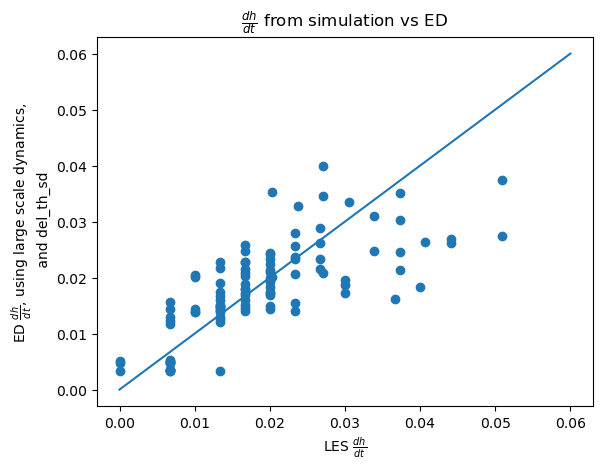

In [43]:
plt.scatter(dh_dt, ssd_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_sd")

### full sd

In [132]:
pbl_h_model_new.equations_.iloc[-1, 4]

x0*(x4 + 6.778782)/x1

In [133]:
pbl_h_model_new.equations_.iloc[-1,5]

PySRFunction(X=>x0*(x4 + 6.778782)/x1)

In [44]:
fsd_pred = b_flux*(u_g + 6.778782)/del_th_sd
print(f"rmse of this method is {np.sqrt(np.mean((fsd_pred-dh_dt)**2))}")

first_fsd = b_flux*(u_g)/del_th_sd
sec_fsd = b_flux*(6.778782)/del_th_sd

fsd = pd.DataFrame(np.column_stack([first_fsd, sec_fsd, fsd_pred]), 
                   columns=["first", "second", "pred"])

fsd["first_percent"] = fsd["first"] / fsd["pred"]
fsd["sec_percent"] = fsd["second"] / fsd["pred"]

fsd.describe()

rmse of this method is 0.007619046653010665


,first,second,pred,first_percent,sec_percent
count,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.009296,0.007905,0.017201,0.511428,0.488572
std,0.009019,0.005129,0.012304,0.190533,0.190533
min,0.000745,0.001444,0.003272,0.227822,0.297592
25%,0.003636,0.003658,0.008220,0.227822,0.297592
50%,0.005498,0.006846,0.014657,0.541317,0.458683
75%,0.012455,0.011269,0.023430,0.702408,0.772178
max,0.044867,0.021650,0.063876,0.702408,0.772178


Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_sd')

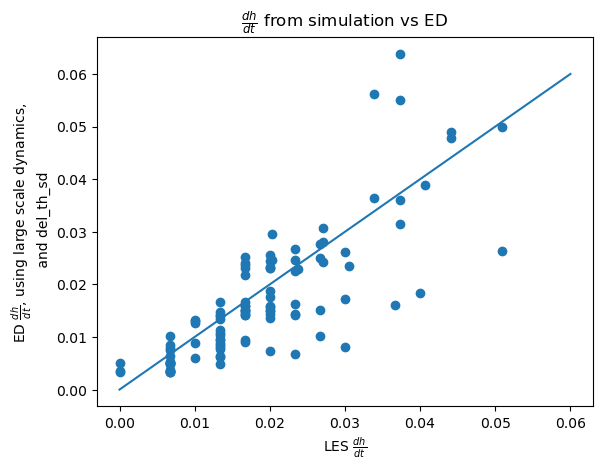

In [81]:
plt.scatter(dh_dt, fsd_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_sd")

### small flux meth

In [66]:
pbl_h_model_new.equations_.iloc[-1, 4]

5.29135300848871*(b_flux + 0.005095266)/del_th_f

In [67]:
pbl_h_model_new.equations_.iloc[-1, 5]

PySRFunction(X=>5.29135300848871*(b_flux + 0.005095266)/del_th_f)

In [68]:
sf_pred = 5.29135300848871*(b_flux + 0.005095266)/del_th_f
print(f"rmse of this method is {np.sqrt(np.mean((sf_pred-dh_dt)**2))}")

rmse of this method is 0.00853497864723838


Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using b_flux and del_th_f')

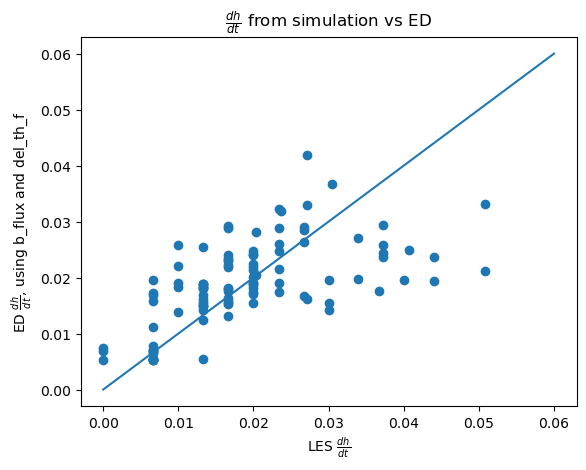

In [75]:
plt.scatter(dh_dt, sf_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using b_flux and del_th_f")

### full flux meth

In [71]:
pbl_h_model_new.equations_.iloc[-1, 4]

b_flux*(u_g + 8.668527)/del_th_f

In [72]:
pbl_h_model_new.equations_.iloc[-1, 5]

PySRFunction(X=>b_flux*(u_g + 8.668527)/del_th_f)

In [73]:
ff_pred = b_flux*(u_g + 8.668527)/del_th_f
print(f"rmse of this method is {np.sqrt(np.mean((ff_pred-dh_dt)**2))}")

rmse of this method is 0.007814035514122861


Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_f')

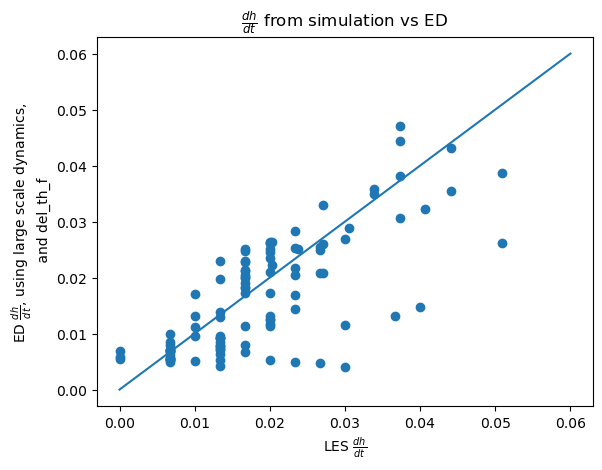

In [77]:
plt.scatter(dh_dt, ff_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics, \n and del_th_f")

## Passing b_flux / del_th as a variable

In [81]:
#making new dataframes

b_del_th_sd = pd.DataFrame(b_flux/del_th_sd, columns=["b_del_th_sd"])

b_del_th_f = pd.DataFrame(b_flux/del_th_sd,
                          columns=["b_del_th_f"])

full_b_del_th_sd = pd.DataFrame(np.column_stack([b_del_th_sd, dth_dz, q, u_g]),
                                columns=["b_del_th_sd", "dth_dz", "q", "u_g"])

full_b_del_th_f = pd.DataFrame(np.column_stack([b_del_th_f, dth_dz, q, u_g]),
                                columns=["b_del_th_f", "dth_dz", "q", "u_g"])

In [86]:
pbl_h_model_new.fit(full_b_del_th_sd, dh_dt)

/home/laurapong321/anaconda3/envs/pnw_env/lib/python3.12/site-packages/pysr/sr.py:1843: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/laurapong321/anaconda3/envs/pnw_env/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                        -0.11007401   
	1        2.539077                          b_del_th_sd + 0.017559659   
	2        0.192991                            13.891541 * b_del_th_sd   
	3        0.209596                 (b_del_th_sd * u_g) - -0.009651616   
	4        0.023745  (0.009293074 + b_del_th_sd) + (u_g * b_del_th_sd)   
	5  >>>>  0.290256  (u_g * 0.00096481206) - (b_del_th_sd / -0.1042...   
	
	       loss  complexity  
	0  0.016733           1  
	1  0.000104           3  
	2  0.000086           4  
	3  0.000057           6  
	4  0.000054           8  
	5  0.000040           9  
]

### simple model

#### $\frac{\overline{w\theta}}{\Delta\theta_\rho}$, sd meth

In [131]:
pbl_h_model_new.equations_.iloc[-1, 4]

9.24243768036848*b_del_th_sd + 0.008050551

In [132]:
pbl_h_model_new.equations_.iloc[-1, 5]

PySRFunction(X=>9.24243768036848*b_del_th_sd + 0.008050551)

In [61]:
b_del_th_sd_pred = 9.24243768036848*b_del_th_sd["b_del_th_sd"].to_numpy() + 0.008050551
b_del_th_sd_first = 9.24243768036848*b_del_th_sd["b_del_th_sd"].to_numpy()
b_del_th_sd_sec = .008050551*np.ones(b_del_th_sd.shape)

b_del_th_sd_df = pd.DataFrame(np.column_stack([b_del_th_sd_first, b_del_th_sd_sec, b_del_th_sd_pred]),
                              columns=["first", "sec", "pred"])

print(f"rmse of this method is {np.sqrt(np.mean((b_del_th_sd_pred-dh_dt)**2))}")
print(f"A term is {9.24243768036848*9.81/300}")

b_del_th_sd_df["first_percent"] = b_del_th_sd_df["first"] / b_del_th_sd_df["pred"]
b_del_th_sd_df["sec_percent"] = b_del_th_sd_df["sec"] / b_del_th_sd_df["pred"]
b_del_th_sd_df.describe()

rmse of this method is 0.008147050116159389
A term is 0.30222771214804933


,first,sec,pred,first_percent,sec_percent
count,106.000000,1.060000e+02,106.000000,106.000000,106.000000
mean,0.010778,8.050551e-03,0.018828,0.511484,0.488516
std,0.006993,1.742964e-18,0.006993,0.175008,0.175008
min,0.001969,8.050551e-03,0.010020,0.196553,0.214291
25%,0.004987,8.050551e-03,0.013038,0.382509,0.343824
50%,0.009334,8.050551e-03,0.017385,0.536894,0.463106
75%,0.015364,8.050551e-03,0.023415,0.656176,0.617491
max,0.029518,8.050551e-03,0.037568,0.785709,0.803447


Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using b_flux/del_th_sd')

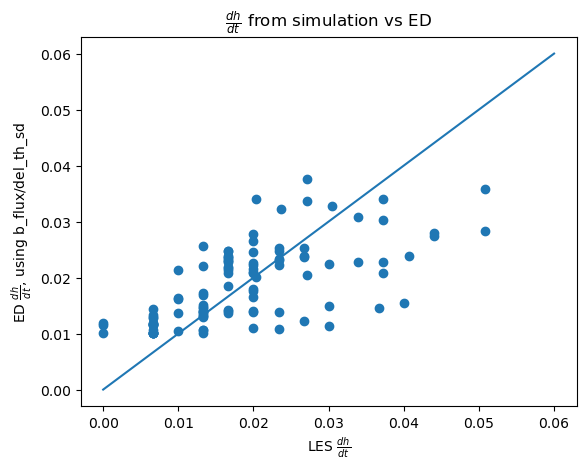

In [47]:
plt.scatter(dh_dt, b_del_th_sd_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using b_flux/del_th_sd")

#### $\frac{\overline{w\theta}}{\Delta\theta_\rho}$, flux meth

In [139]:
pbl_h_model_new.equations_.iloc[-1, 4]

9.168318*b_del_th_f + 0.008106074

In [140]:
pbl_h_model_new.equations_.iloc[-1, 5]

PySRFunction(X=>9.168318*b_del_th_f + 0.008106074)

In [63]:
b_del_th_f_pred = 9.168318*b_del_th_f["b_del_th_f"].to_numpy() + 0.008106074
b_del_th_f_first = 9.168318*b_del_th_f["b_del_th_f"].to_numpy()
b_del_th_f_sec = .008106074 *np.ones(b_del_th_f_first.shape)

b_del_th_f_df = pd.DataFrame(np.column_stack([b_del_th_f_first, b_del_th_f_sec, b_del_th_f_pred]),
                             columns=["first", "sec", "pred"])

b_del_th_f_df["first_percent"] = b_del_th_f_df["first"] / b_del_th_f_df["pred"]
b_del_th_f_df["sec_percent"] = b_del_th_f_df["sec"] / b_del_th_f_df["pred"]

print(f"rmse of this method is {np.sqrt(np.mean((b_del_th_f_pred-dh_dt)**2))}")
print(f"A is {9.168318*9.81/300}")

b_del_th_f_df.describe()

rmse of this method is 0.00814699013104459
A is 0.2998039986


,first,sec,pred,first_percent,sec_percent
count,106.000000,1.060000e+02,106.000000,106.000000,106.000000
mean,0.010691,8.106074e-03,0.018797,0.508206,0.491794
std,0.006937,1.742964e-18,0.006937,0.174915,0.174915
min,0.001954,8.106074e-03,0.010060,0.194207,0.216815
25%,0.004947,8.106074e-03,0.013053,0.378990,0.347199
50%,0.009259,8.106074e-03,0.017365,0.533181,0.466819
75%,0.015241,8.106074e-03,0.023347,0.652801,0.621010
max,0.029281,8.106074e-03,0.037387,0.783185,0.805793


Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using b_flux/del_th_f')

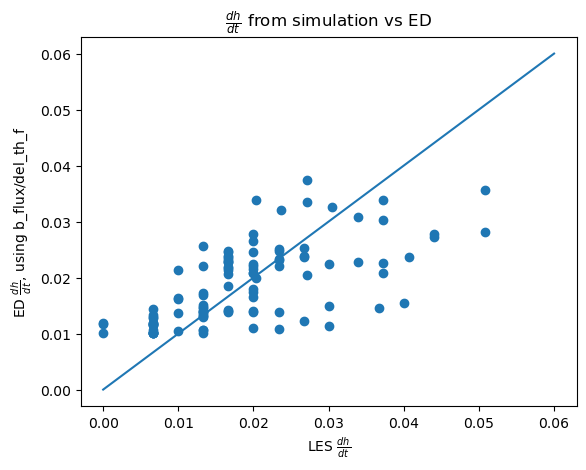

In [142]:
plt.scatter(dh_dt, b_del_th_f_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using b_flux/del_th_f")

####  $\frac{\overline{w\theta}}{\Delta\theta_\rho}$, and large scale dynamics, sd meth

In [144]:
pbl_h_model_new.equations_.iloc[-1, 4]

9.961432*b_del_th_sd + 0.0009702546*u_g

In [145]:
pbl_h_model_new.equations_.iloc[-1, 5]

PySRFunction(X=>9.961432*b_del_th_sd + 0.0009702546*u_g)

In [65]:
full_b_del_th_sd_pred = 9.961432*b_del_th_sd["b_del_th_sd"].to_numpy() + 0.0009702546*u_g
full_b_del_th_sd_first = 9.961432*b_del_th_sd["b_del_th_sd"].to_numpy()
full_b_del_th_sd_sec = 0.0009702546*u_g

full_b_del_th_sd_df = pd.DataFrame(np.column_stack([full_b_del_th_sd_first, full_b_del_th_sd_sec, full_b_del_th_sd_pred]),
                                   columns=["first", "sec", "pred"])

full_b_del_th_sd_df["first_percent"] = full_b_del_th_sd_df["first"] / full_b_del_th_sd_df["pred"]
full_b_del_th_sd_df["sec_percent"] = full_b_del_th_sd_df["sec"] / full_b_del_th_sd_df["pred"]


print(f"rmse of this method is {np.sqrt(np.mean((full_b_del_th_sd_pred-dh_dt)**2))}")
print(f"A is {9.961432*9.81/300}")
full_b_del_th_sd_df.describe()

rmse of this method is 0.006400409134945413
A is 0.3257388264


,first,sec,pred,first_percent,sec_percent
count,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.011616,0.008897,0.020513,0.550723,0.449277
std,0.007537,0.005415,0.007673,0.248348,0.248348
min,0.002123,0.001941,0.005653,0.120287,0.057489
25%,0.005375,0.001941,0.016781,0.409143,0.319953
50%,0.010060,0.007762,0.019037,0.576285,0.423715
75%,0.016559,0.015524,0.023954,0.680047,0.590857
max,0.031814,0.015524,0.043458,0.942511,0.879713


Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics and b_flux/del_th_sd')

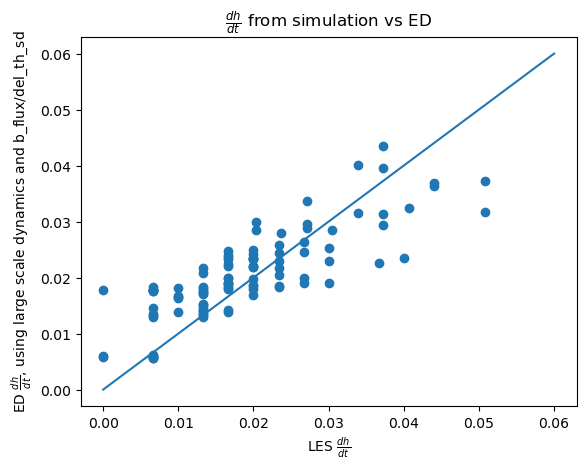

In [150]:
plt.scatter(dh_dt, full_b_del_th_sd_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics and b_flux/del_th_sd")

#### $\frac{\overline{w\theta}}{\Delta\theta_\rho}$, and large scale dynamics, flux meth

In [152]:
pbl_h_model_new.equations_.iloc[-1, 4]

9.18757575156207*b_del_th_f + 0.0010541737*u_g

In [153]:
pbl_h_model_new.equations_.iloc[-1, 5]

PySRFunction(X=>9.18757575156207*b_del_th_f + 0.0010541737*u_g)

In [67]:
full_b_del_th_f_pred = 9.18757575156207*b_del_th_f["b_del_th_f"].to_numpy() + 0.0010541737*u_g
full_b_del_th_f_first = 9.18757575156207*b_del_th_f["b_del_th_f"].to_numpy() 
full_b_del_th_f_sec = 0.0010541737*u_g

full_b_del_th_f_df = pd.DataFrame(np.column_stack([full_b_del_th_f_first, full_b_del_th_f_sec, full_b_del_th_f_pred]),
                                  columns=["first", "sec", "pred"])

full_b_del_th_f_df["first_percent"] = full_b_del_th_f_df["first"] / full_b_del_th_f_df["pred"]
full_b_del_th_f_df["sec_percent"] = full_b_del_th_f_df["sec"] / full_b_del_th_f_df["pred"]

print(f"rmse of this method is {np.sqrt(np.mean((full_b_del_th_f_pred-dh_dt)**2))}")
print(f"A is {9.18757575156207*9.81/300}")

full_b_del_th_f_df.describe()

rmse of this method is 0.0065364735031885
A is 0.30043372707607974


,first,sec,pred,first_percent,sec_percent
count,106.000000,106.000000,106.000000,106.000000,106.000000
mean,0.010714,0.009667,0.020380,0.520102,0.479898
std,0.006952,0.005884,0.007458,0.250839,0.250839
min,0.001958,0.002108,0.005533,0.104001,0.067036
25%,0.004958,0.002108,0.016593,0.370208,0.356597
50%,0.009279,0.008433,0.019250,0.535869,0.464131
75%,0.015273,0.016867,0.023776,0.643403,0.629792
max,0.029343,0.016867,0.042630,0.932964,0.895999


Text(0, 0.5, 'ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics and b_flux/del_th_f')

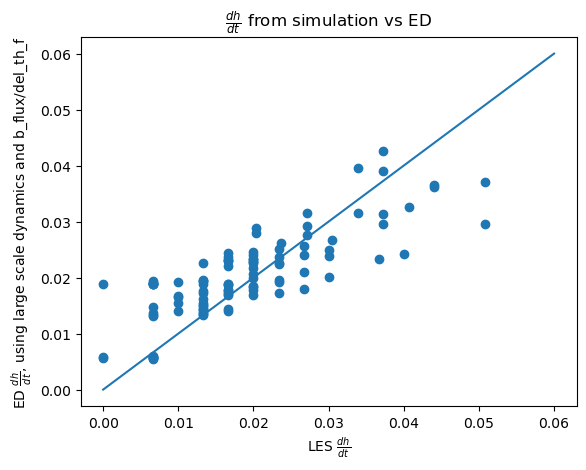

In [157]:
plt.scatter(dh_dt, full_b_del_th_f_pred)
plt.plot([0,.06], [0,.06])
plt.title("$\\frac{{{dh}}}{{{dt}}}$ from simulation vs ED")
plt.xlabel("LES $\\frac{{{dh}}}{{{dt}}}$")
plt.ylabel("ED $\\frac{{{dh}}}{{{dt}}}$, using large scale dynamics and b_flux/del_th_f")

# Results

In [68]:
#putting all the results into a dataframe

pysr_model = ["complex", "complex", "complex", "complex",
               "simple", "simple", "simple", "simple",
               "simple", "simple", "simple", "simple"]

model_input = ["small_sd", "small_flux", "full_sd", "full_flux",
                "small_sd", "small_flux", "full_sd", "full_flux",
                "small_fraction_sd", "small_fraction_f", "full_fraction_sd", "full_fraction_f"]

equation = ["(b_flux + b_flux/(b_flux + 0.1337) + 0.01673)/(del_th_sd + 0.1337/del_th_sd**3)",
            "b_flux*(-3.6689*b_flux - 1.5784*del_th_f + 6.7074 + 0.01461/b_flux)",
            "b_flux + (0.6607*b_flux*(0.9514*u_g + 3.9926) + 0.01211)/del_th_sd",
            "(b_flux*(u_g + 0.7956 + 5.1005/(u_g - 0.4188)) + 0.01622)/del_th_f",
            "8.1173*(b_flux + 0.001776)/del_th_sd",
            "5.2914*(b_flux + 0.005095)/del_th_f", 
            "b_flux*(u_g + 6.7788)/del_th_sd",
            "b_flux*(u_g + 8.6686)/del_th_f",
            "9.2424*b_del_th_sd + 0.008051",
            "9.1683*b_del_th_f + 0.008106",
            "9.961432*b_del_th_sd + 0.0009702546*u_g",
            "9.18757575156207*b_del_th_f + 0.0010541737*u_g"
             ]

rmse = [.00715, .00799, .00594, .0063,
        .00728, .00853, .00762, .00781,
        .00815, .00815, .0064, .00654]

results_df = pd.DataFrame(np.column_stack([pysr_model, model_input, equation, rmse]),
                          columns=["pysr_model", "model_input", "equation", "rmse"])

In [69]:
results_df

,pysr_model,model_input,equation,rmse
0,complex,small_sd,(b_flux + b_flux/(b_flux + 0.1337) + 0.01673)/...,0.00715
1,complex,small_flux,b_flux*(-3.6689*b_flux - 1.5784*del_th_f + 6.7...,0.00799
2,complex,full_sd,b_flux + (0.6607*b_flux*(0.9514*u_g + 3.9926) ...,0.00594
3,complex,full_flux,(b_flux*(u_g + 0.7956 + 5.1005/(u_g - 0.4188))...,0.0063
4,simple,small_sd,8.1173*(b_flux + 0.001776)/del_th_sd,0.00728
5,simple,small_flux,5.2914*(b_flux + 0.005095)/del_th_f,0.00853
6,simple,full_sd,b_flux*(u_g + 6.7788)/del_th_sd,0.00762
7,simple,full_flux,b_flux*(u_g + 8.6686)/del_th_f,0.00781
8,simple,small_fraction_sd,9.2424*b_del_th_sd + 0.008051,0.00815
9,simple,small_fraction_f,9.1683*b_del_th_f + 0.008106,0.00815
